## Part 1.

In [32]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [75]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [34]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [35]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

In [37]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [38]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_pop

,Country,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [39]:
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]


In [40]:
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]

In [41]:
maddison_old_pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [42]:
pop = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)
pop = pop.dropna(subset=['pop_1'])
pop = pop.loc[2:]
pop['Country'] = pop.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
pop = pop.loc[pop.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [43]:
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


 Let's convert from wide to long format 

In [44]:
pop = pd.wide_to_long(pop, ['pop_'], i='Country', j='year').reset_index()
pop

,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
...,...,...,...
499,East Europe,2030,113555
500,Latin America,2030,724465
501,Asia,2030,4.91693e+06
502,Africa,2030,1.51743e+06


In [45]:
pop_1 = pop.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
pop_1

Country,Africa,Asia,East Europe,Latin America,Western Europe,Western Offshoots,World
year,,,,,,,
1,17000.000,1.684000e+05,4750.000,5600.000,25050.000,1120.0,2.258200e+05
1000,32300.000,1.826000e+05,6500.000,11400.000,25560.000,1870.0,2.673300e+05
1500,46610.000,2.838000e+05,13500.000,17500.000,57268.000,2800.0,4.384280e+05
1600,55320.000,3.785000e+05,16950.000,8600.000,73778.000,2300.0,5.561480e+05
1700,61080.000,4.018000e+05,18800.000,12050.000,81460.000,1750.0,6.034900e+05
...,...,...,...,...,...,...,...
2006,931486.521,3.882964e+06,120463.680,565415.973,399607.161,355678.0,6.540214e+06
2007,952787.083,3.927514e+06,120378.032,572829.964,400512.458,358548.0,6.616689e+06
2008,974527.690,3.972154e+06,120274.466,580217.248,401352.880,362621.0,6.694832e+06


In [46]:
import matplotlib as mpl
import seaborn as sns
sns.set()

Text(0, 0.5, 'Evolution of total population across the world')

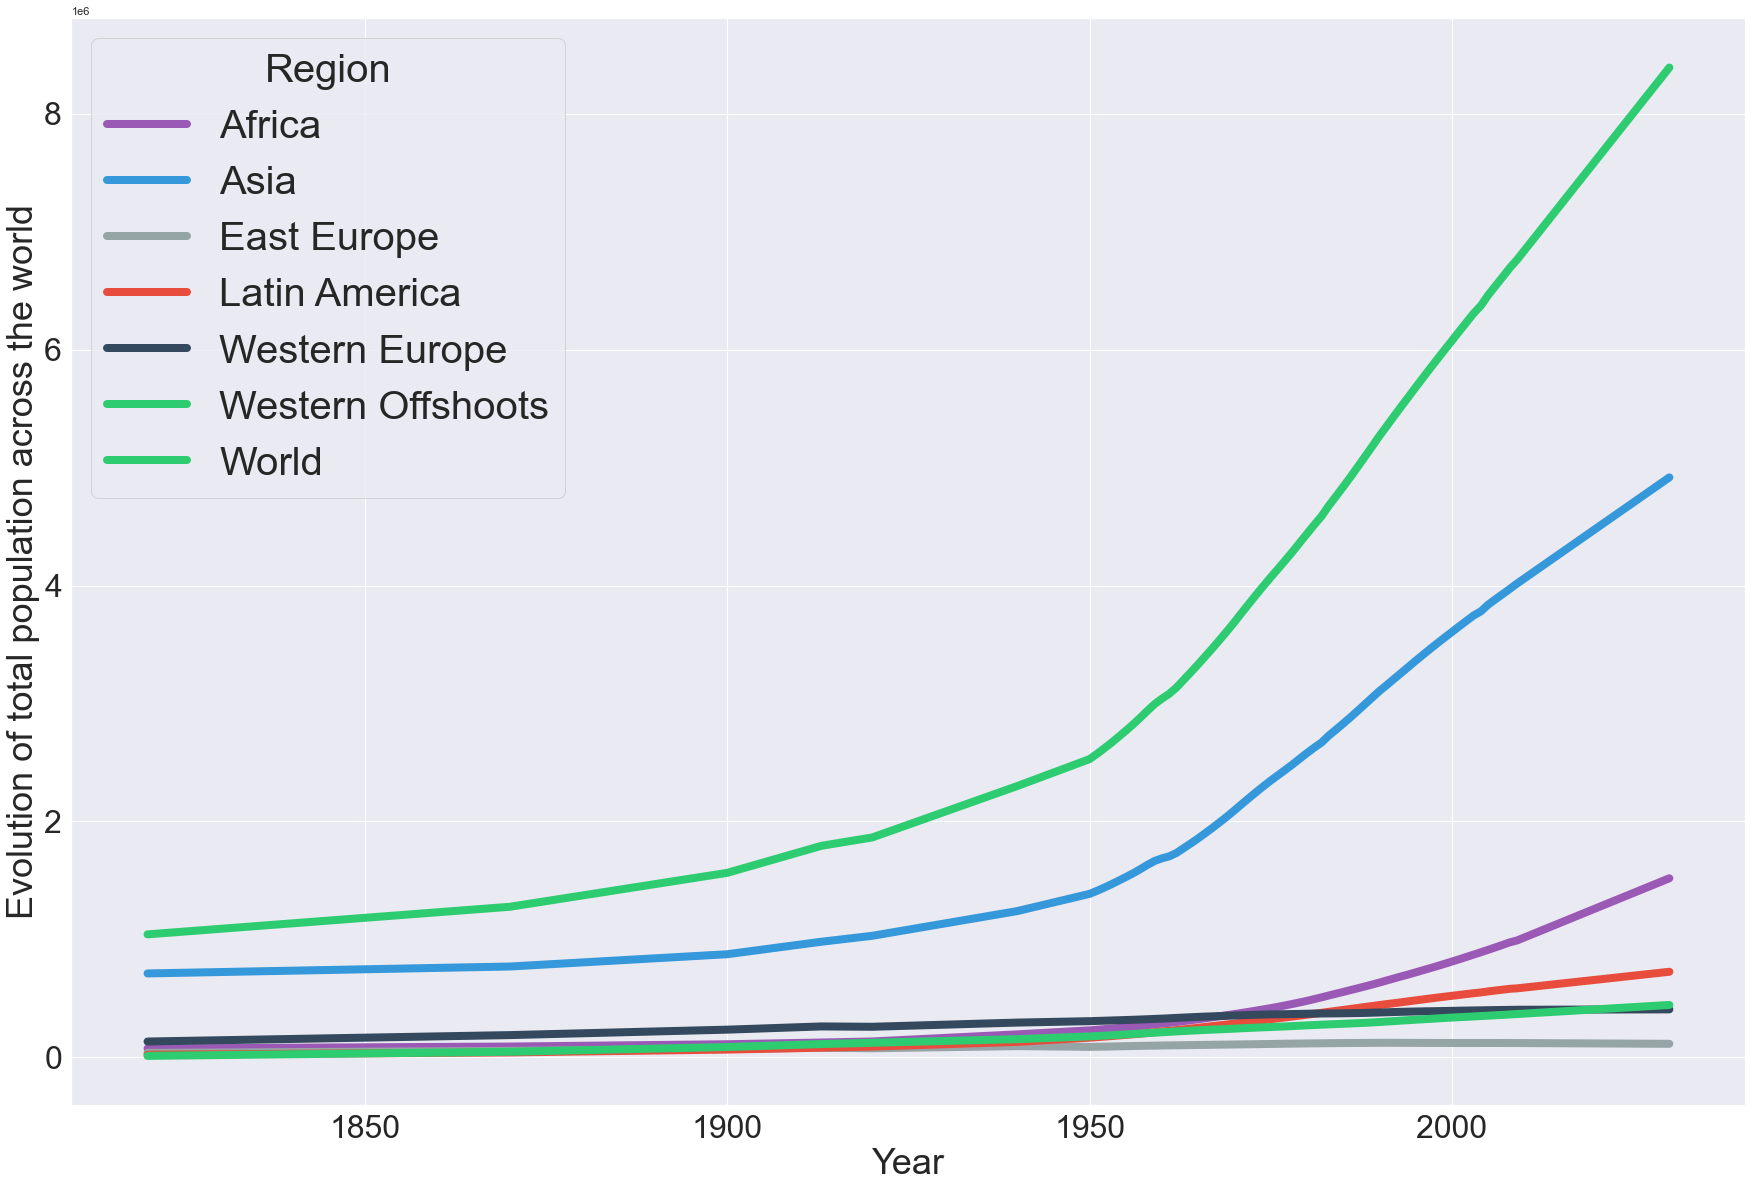

In [47]:

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
fig, ax = plt.subplots(figsize=(30,20))
pop_1.loc[1800:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Evolution of total population across the world', fontsize=36)



## Part 2.

In [48]:

if not os.path.exists(pathout + 'worldbank_pop.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'worldbank_pop.xls')

In [49]:
worldbank_pop = pd.read_excel(pathout + 'worldbank_pop.xls', sheet_name="Data", skiprows=3)
worldbank_pop = worldbank_pop[[col for col in worldbank_pop.columns if str(col).startswith('Unnamed')==False]]
worldbank_pop = worldbank_pop.drop('Country Code', 1)
worldbank_pop = worldbank_pop.drop('Indicator Name', 1)
worldbank_pop = worldbank_pop.drop('Indicator Code', 1)
worldbank_pop


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN
260,"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN
261,South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN
262,Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN


Text(0, 0.5, 'Total World population')

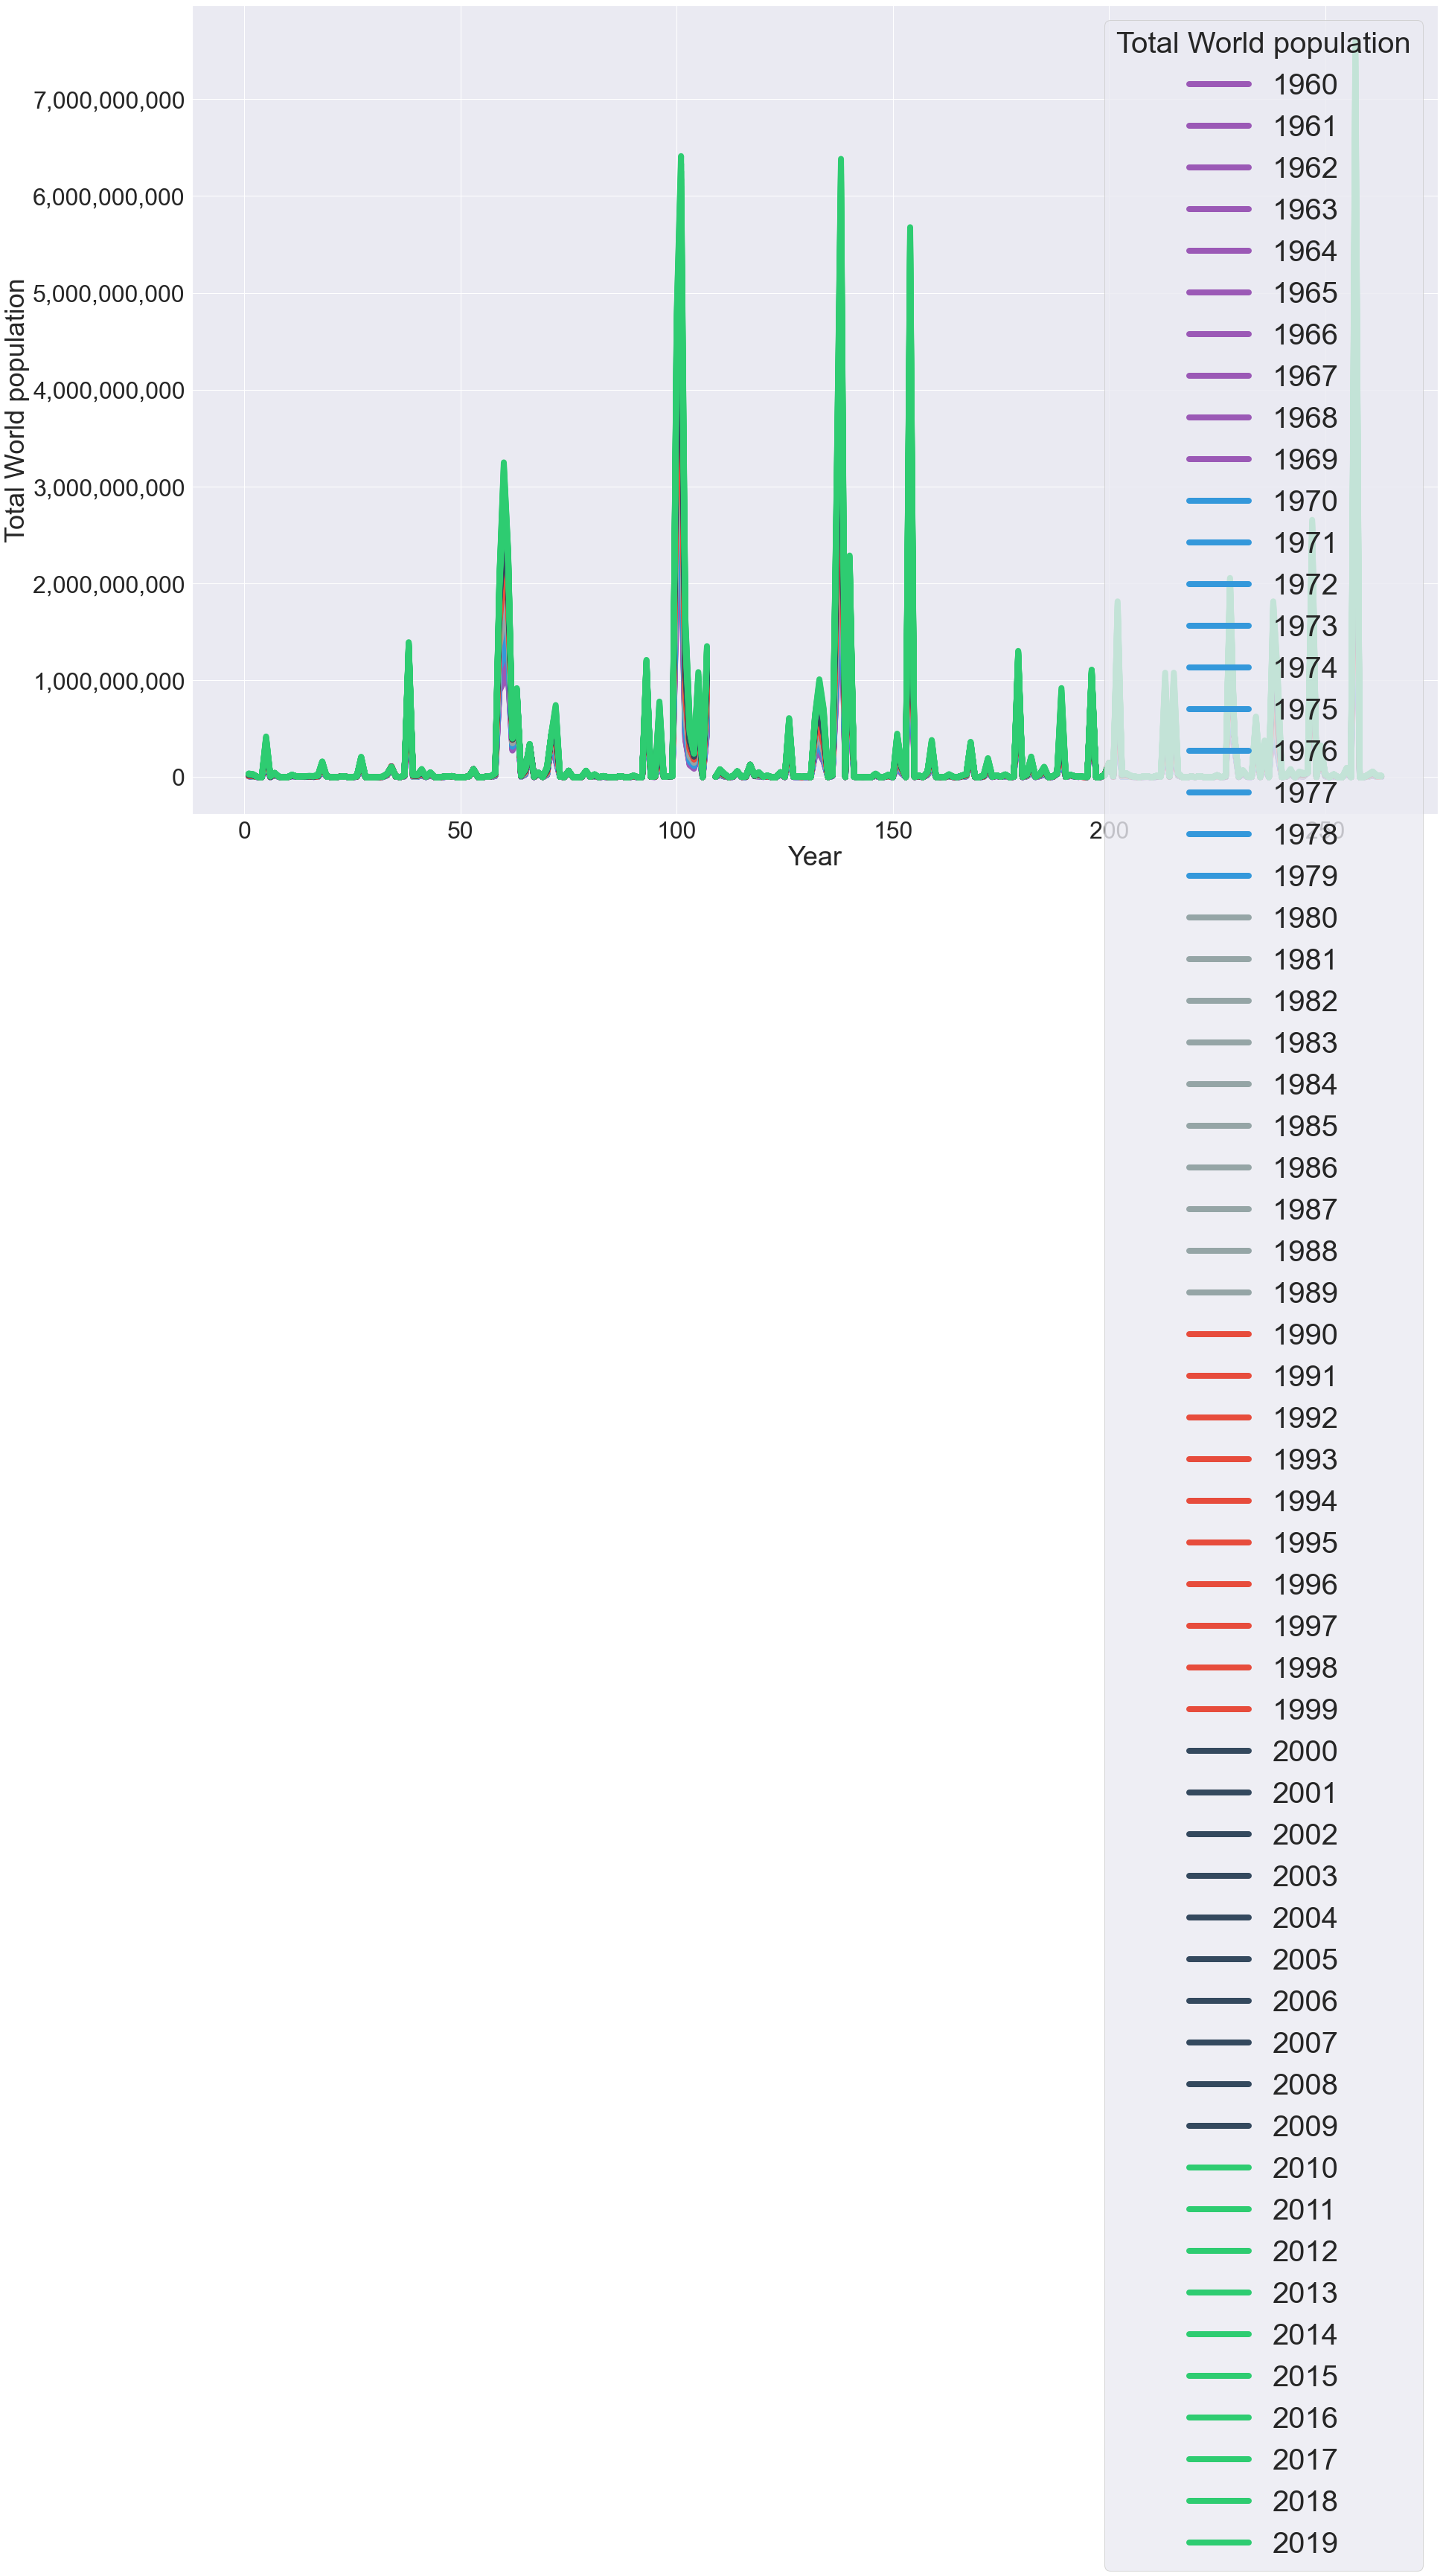

In [33]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
fig, ax = plt.subplots(figsize=(30,20))
worldbank_pop.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Total World population", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total World population', fontsize=36)

## Part 3. 

In [50]:

if not os.path.exists(pathout + 'worldbank_fertility.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'worldbank_fertility.xls')

In [51]:

if not os.path.exists(pathout + 'worldbank_mortality.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.IMRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'worldbank_mortality.xls')

In [52]:
if not os.path.exists(pathout + 'worldbank_life.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'worldbank_life.xls')

In [53]:
ferti = pd.read_excel(pathout + 'worldbank_fertility.xls', sheet_name="Data", skiprows=3)
morta = pd.read_excel(pathout + 'worldbank_mortality.xls', sheet_name="Data", skiprows=3)
life = pd.read_excel(pathout + 'worldbank_life.xls', sheet_name="Data", skiprows=3)

In [62]:
ferti=ferti.T
headferti = ferti.iloc[0]
ferti = pd.DataFrame(ferti.values[1:], columns=headferti)
ferti['World Total Fertility']=ferti[:].mean(axis=1,skipna=True)
ferti_1 = ferti[['World Total Fertility']]

In [66]:
morta=morta.T
headmorta = morta.iloc[0]
morta = pd.DataFrame(morta.values[1:], columns=headmorta)
morta['World Total Mortality']=ferti[:].mean(axis=1,skipna=True)
morta_1 = morta[['World Total Mortality']]

In [71]:
life=life.T
headlife = life.iloc[0]
life = pd.DataFrame(life.values[1:], columns=headlife)
life['World Total Life']=life[:].mean(axis=1,skipna=True)
life_1 = life[['World Total Life']]

Text(0, 0.5, ' World POP')

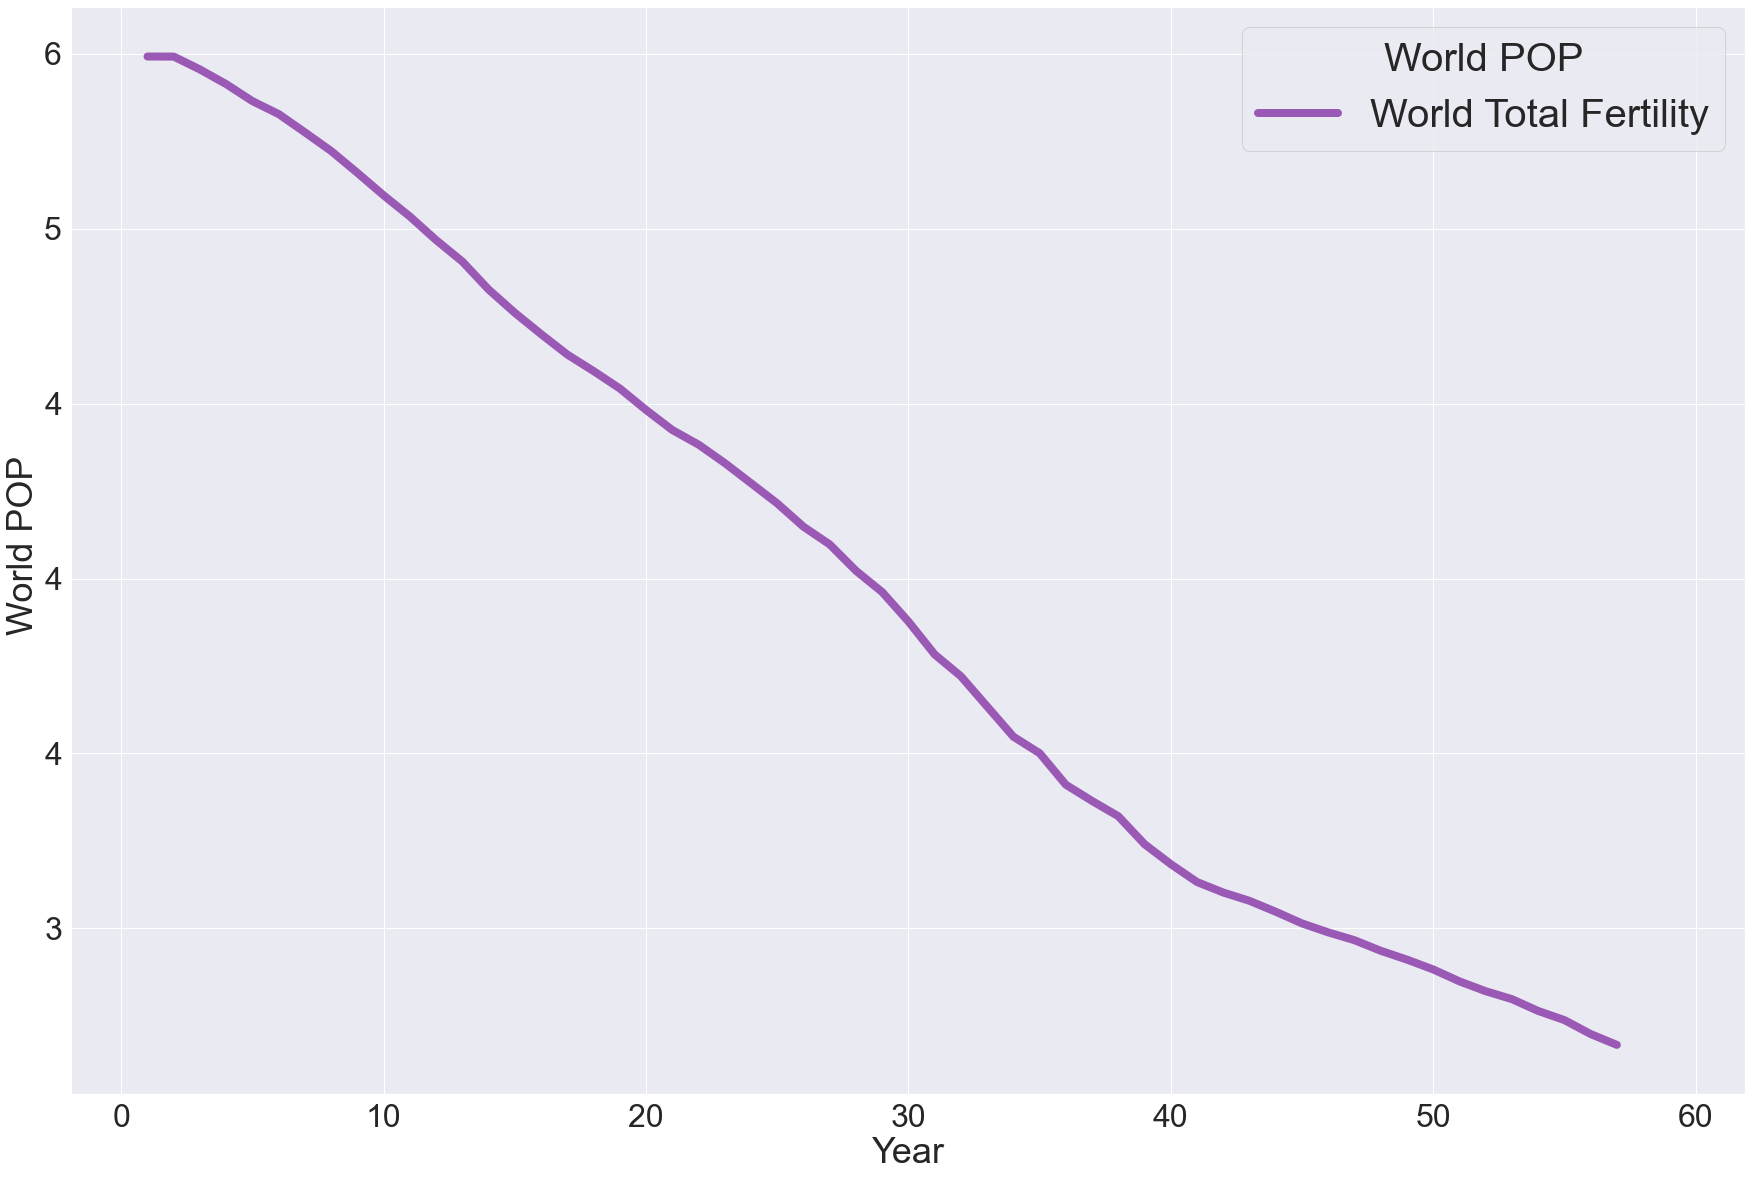

In [60]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
fig, ax = plt.subplots(figsize=(30,20))
ferti_1.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("World POP", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel(' World POP', fontsize=36)

Text(0, 0.5, ' World ')

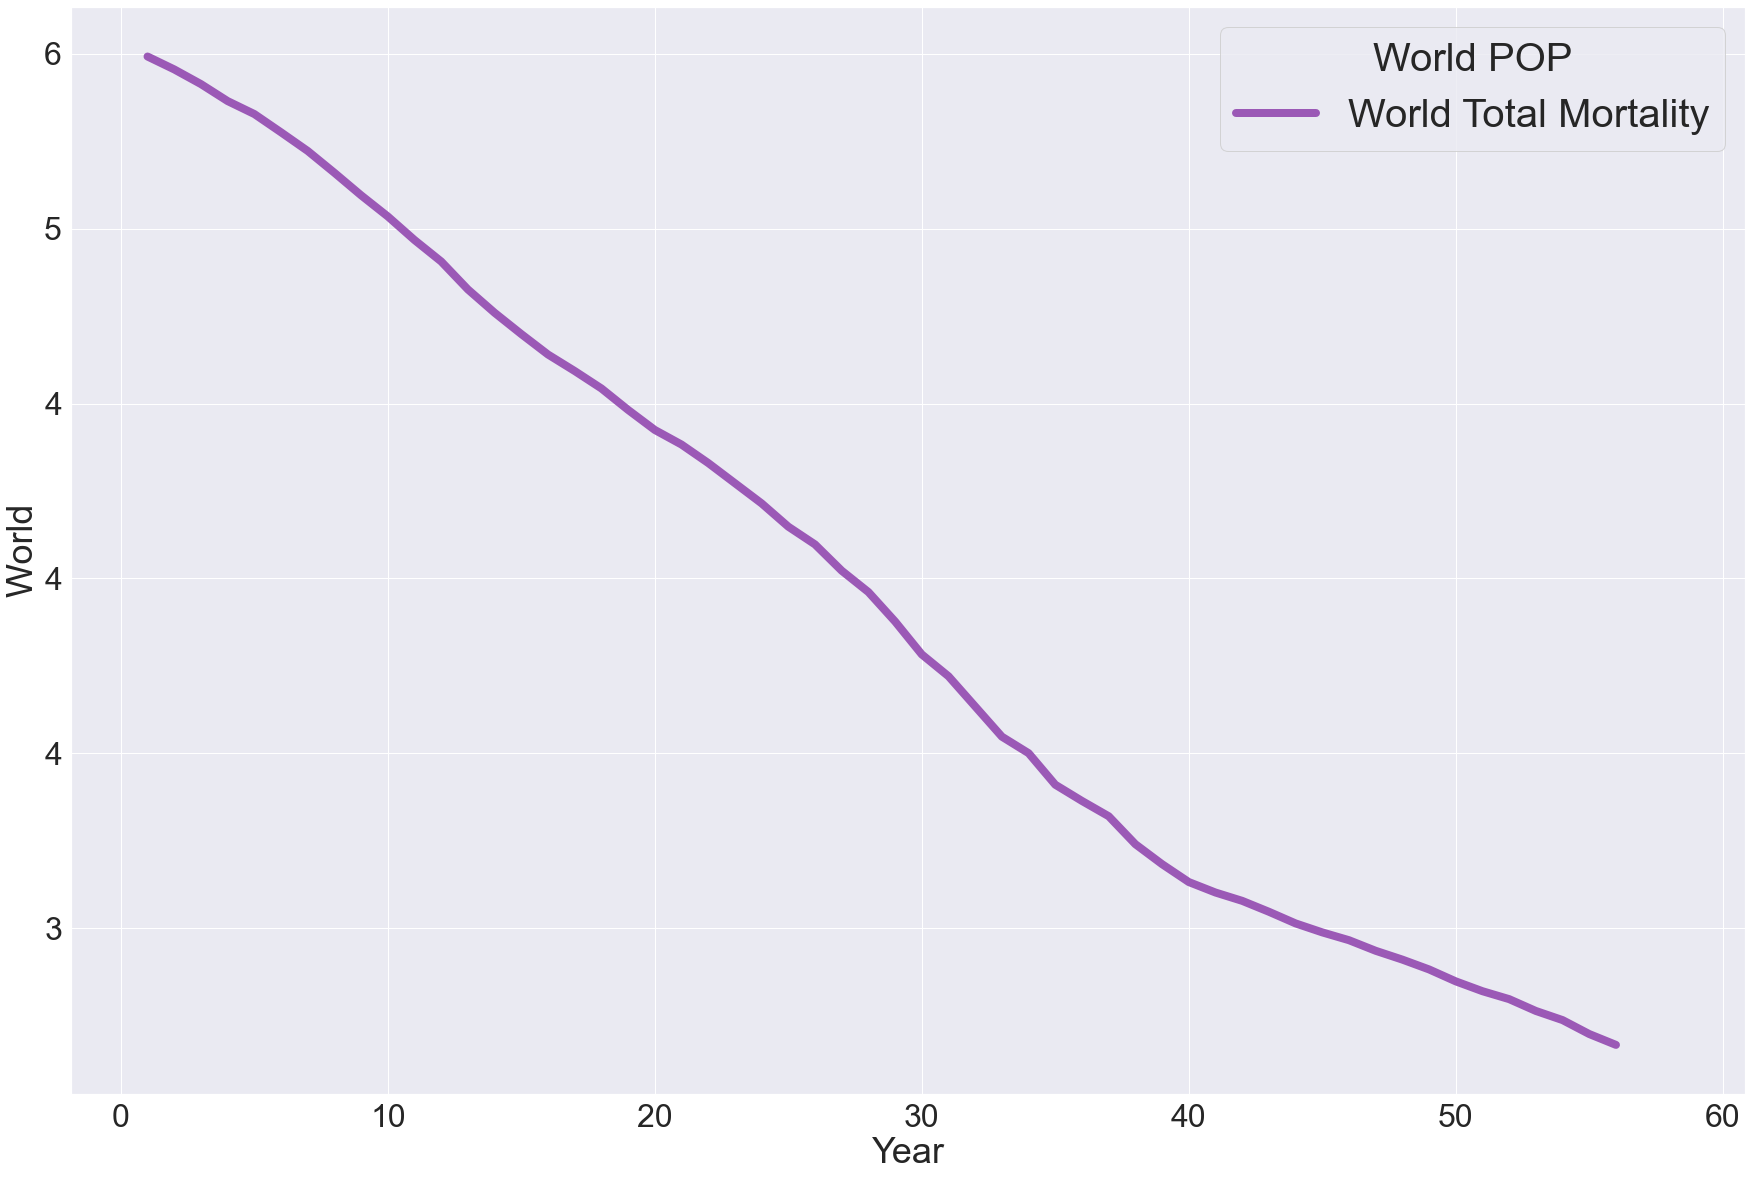

In [67]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
fig, ax = plt.subplots(figsize=(30,20))
morta_1.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("World POP", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel(' World ', fontsize=36)

Text(0, 0.5, ' World ')

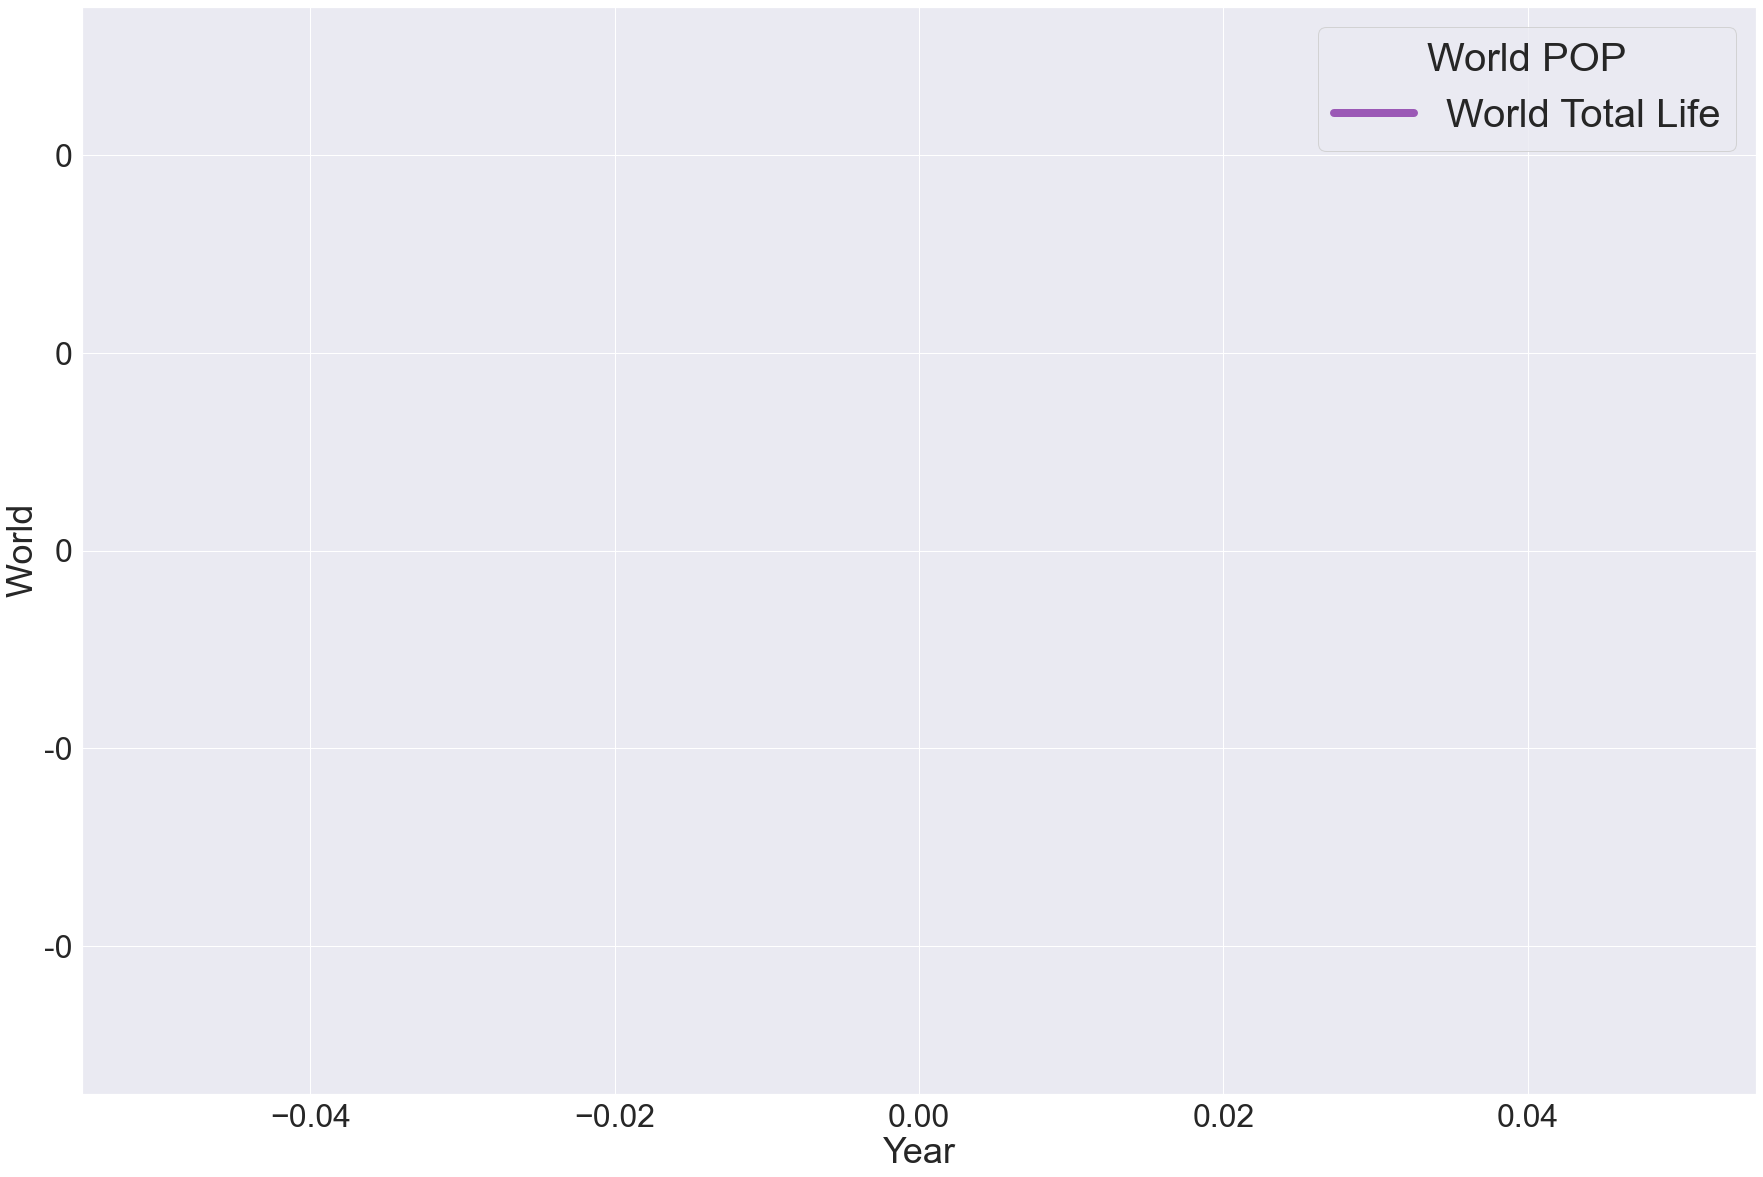

In [73]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
fig, ax = plt.subplots(figsize=(30,20))
life_1.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("World POP", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel(' World ', fontsize=36)

## Part 4.

In [96]:
mortalife = pd.read_excel(pathout + 'stmf.xlsx')